In [104]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, auc, roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer


In [105]:
df= pd.read_csv("/Users/rajasekharreddy/Documents/AZURE-NOTES/Glassdataset.csv")

In [106]:
df

,Id,RI,Na,Mg,AI,SI,K,Ca,Ba,Fe,target
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


/Users/rajasekharreddy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

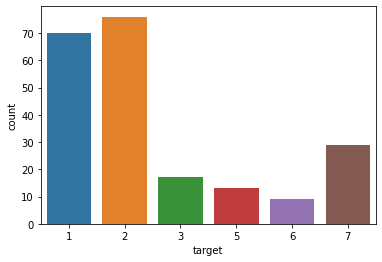

In [107]:
# To check the target species distribution.
sns.countplot(df['target'])

In [108]:
# Extracting the dependent and independent variable.
x= df.iloc[0:,1:-1].values
y=df.iloc[0:,-1].values

In [109]:
x.shape[0]

214

In [110]:
y.shape[0]

214

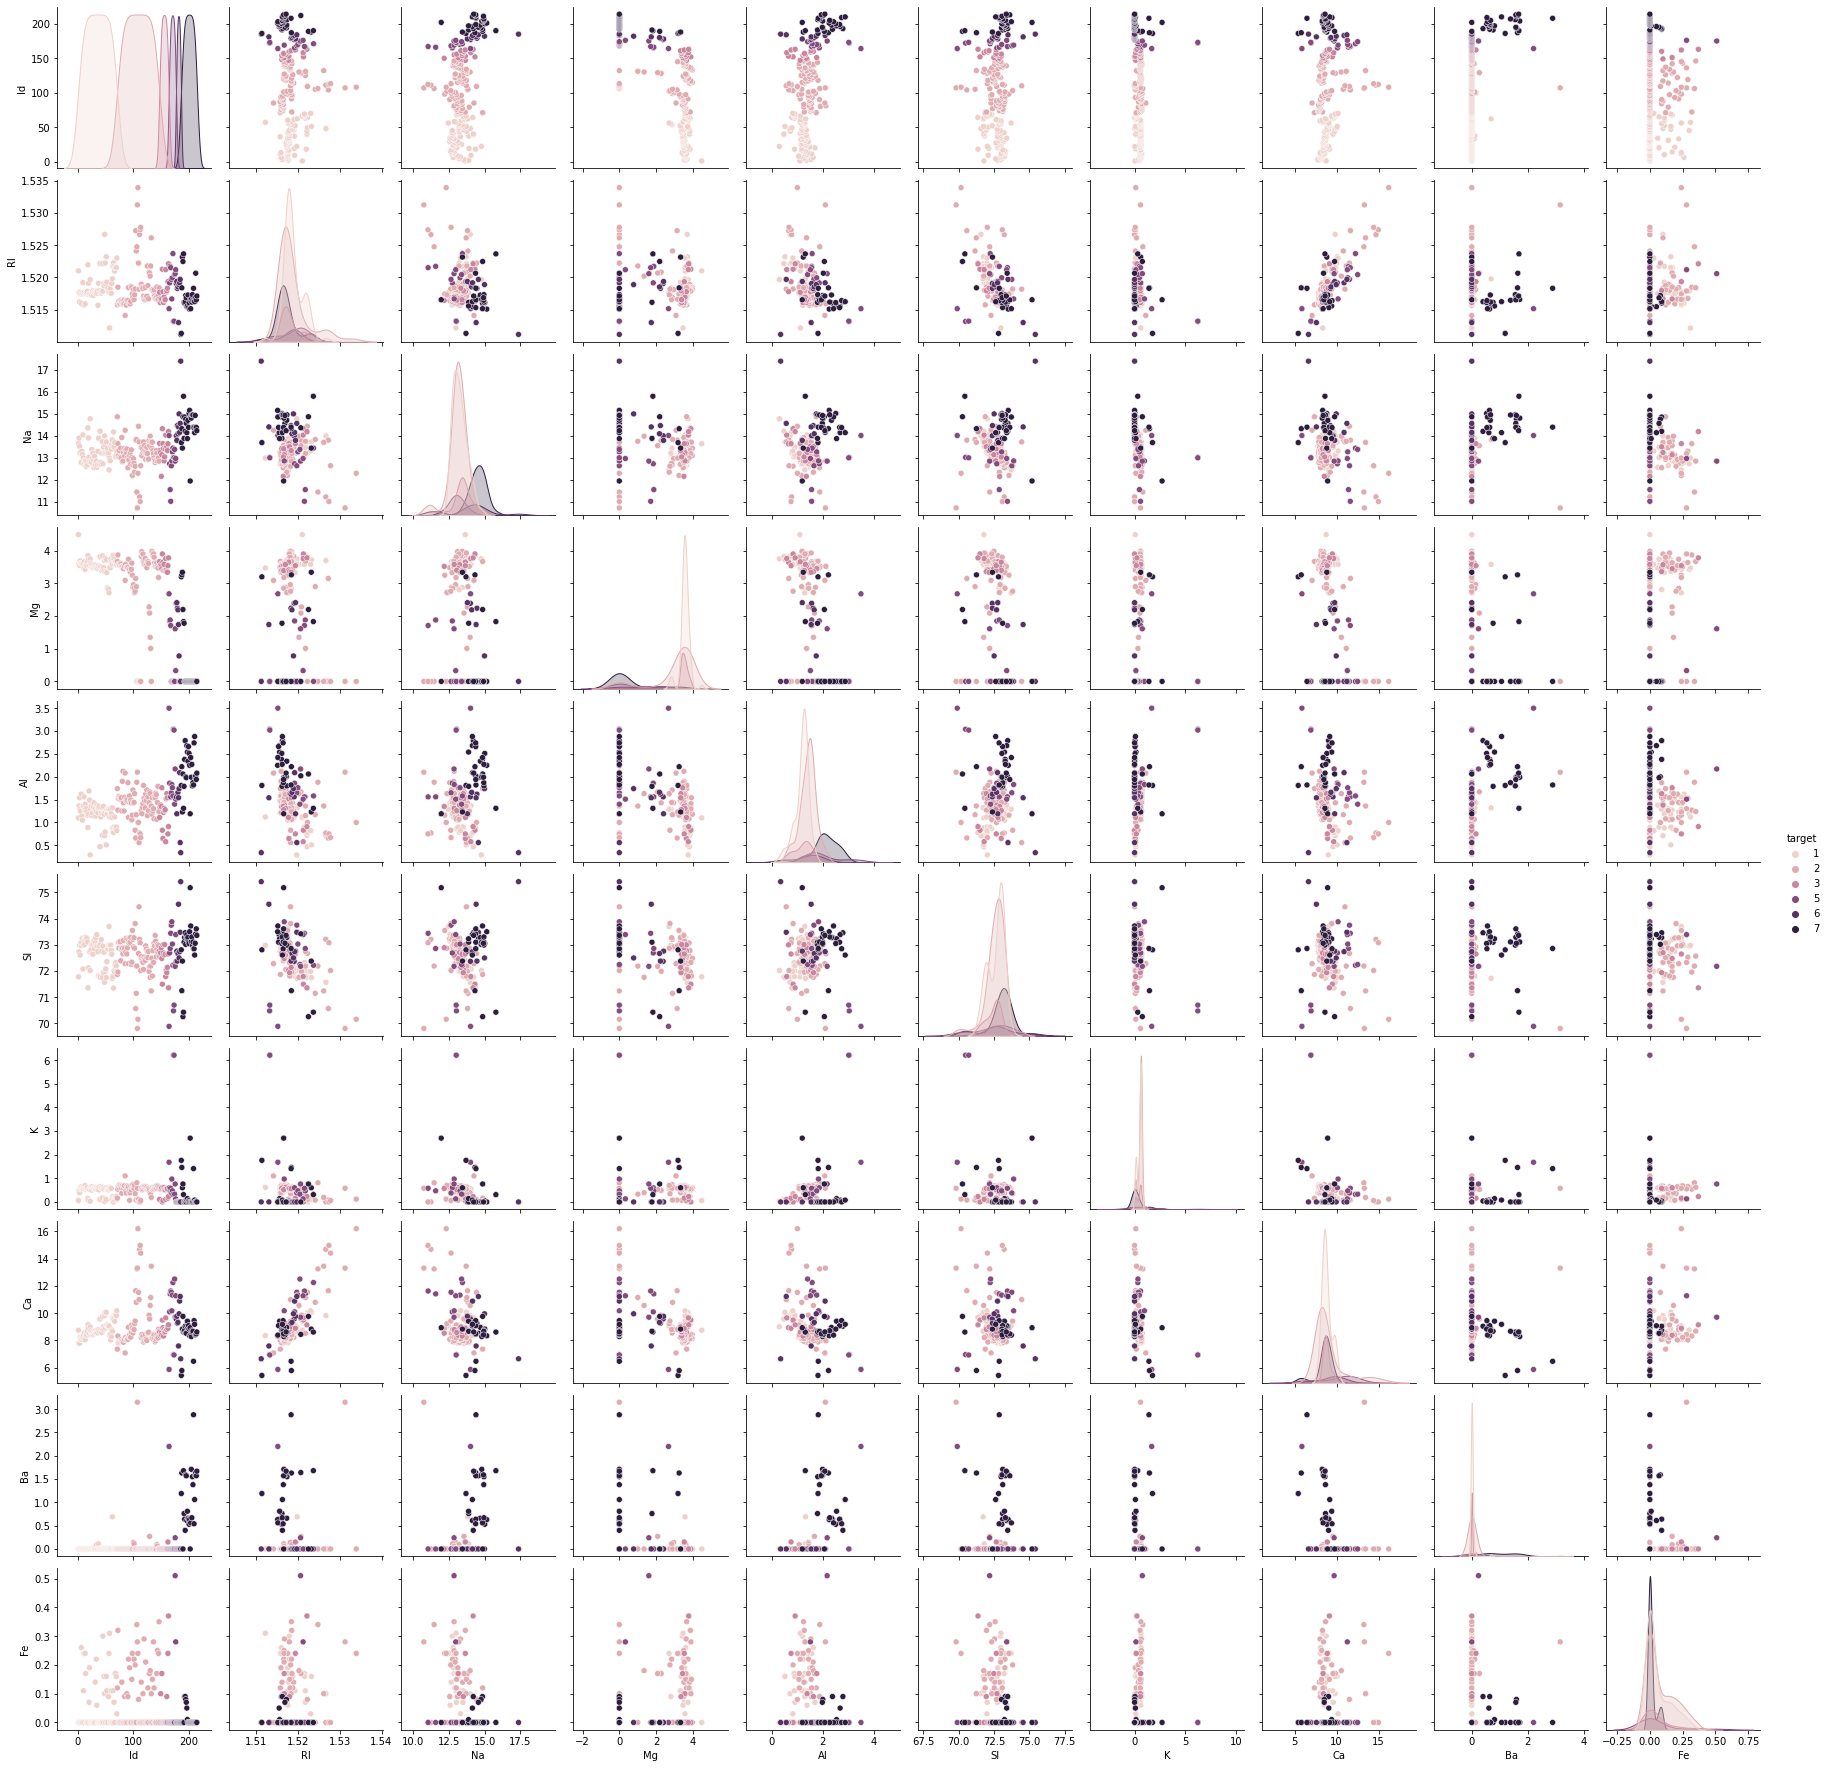

In [111]:
import seaborn as sns
sns.pairplot(df,hue='target')

In [112]:
from sklearn.model_selection import cross_val_score, cross_val_predict,KFold
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve
import numpy as np
from sklearn.svm import SVC

# Kernel = Radial basis function, C=1.0 and gamma='auto'

In [113]:
# Initialize the SVM classifier
svc = SVC(kernel='rbf', C=1.0, gamma='auto')

# Create a 5-fold cross-validation iterator
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the performance of the SVM classifier on each fold of the dataset
scores = cross_val_score(svc, x, y, cv=cv)

In [114]:
# Use cross-validation to evaluate the SVC classifier
svc.fit(x,y)
# Print the accuracy scores for each fold and the mean accuracy
print("Accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

y_pred = cross_val_predict(svc, x, y, cv=5)
cm_svc = confusion_matrix(y, y_pred)

accuracy = accuracy_score(y, y_pred)
cm_svc

Accuracy scores: [0.69767442 0.53488372 0.65116279 0.76744186 0.61904762]
Mean accuracy: 0.6540420819490588


array([[49, 21,  0,  0,  0,  0],
       [20, 47,  0,  6,  2,  1],
       [11,  6,  0,  0,  0,  0],
       [ 0,  6,  0,  7,  0,  0],
       [ 3,  3,  0,  1,  1,  1],
       [ 1,  4,  0,  0,  1, 23]])

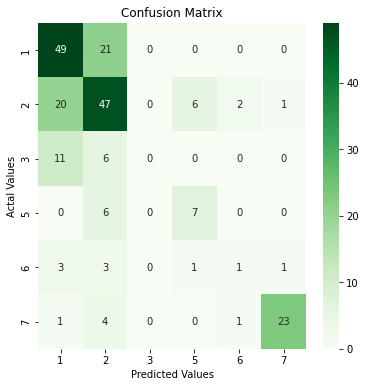

num_classes: 6

Sensitivity_class_0: 0.699999988079071
Specificity_class_0: 0.7569444179534912
F1_score_class_0: 0.6363636196152237

Sensitivity_class_1: 0.6184210777282715
Specificity_class_1: 0.7101449370384216
F1_score_class_1: 0.5766871114719193

Sensitivity_class_2: 0.0
Specificity_class_2: 1.0
F1_score_class_2: nan

Sensitivity_class_3: 0.5384615659713745
Specificity_class_3: 0.96517413854599
F1_score_class_3: 0.5185185312734216

Sensitivity_class_4: 0.1111111119389534
Specificity_class_4: 0.9853658676147461
F1_score_class_4: 0.1538461546397068

Sensitivity_class_5: 0.7931034564971924
Specificity_class_5: 0.9891892075538635
F1_score_class_5: 0.8518518637482522

Overall Accuracy is:  0.5934579439252337


/var/folders/9j/hkprzhjd09b58_tbnqth47br0000gn/T/ipykernel_6128/680805526.py:46: RuntimeWarning: invalid value encountered in float_scalars
  PPV[i] = TP / (TP + FP)


In [115]:

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm_svc,
                     index = ['1','2','3','5','6','7'], 
                     columns = ['1','2','3','5','6','7'])
#Plotting the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm_df,cmap='Greens', fmt='g', annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


# New Code Implemented Today to Compute the values of TPR, FPR, TNR, FNR.
import numpy as np
# assume cm_svc is the confusion matrix for a multiclass classification problem
num_classes = cm_svc.shape[0] # 6

print("num_classes:",num_classes)
print()
TPR = np.zeros(num_classes)
FPR = np.zeros(num_classes)
TNR = np.zeros(num_classes)
FNR = np.zeros(num_classes)
PPV = np.zeros(num_classes)

for i in range(num_classes):
    TP = cm_svc[i, i]
    FN = np.sum(cm_svc[i, :]) - TP
    FP = np.sum(cm_svc[:, i]) - TP
    TN = np.sum(cm_svc) - TP - FN - FP
    
    FP = FP.astype(np.float32)
    FN = FN.astype(np.float32)
    TP = TP.astype(np.float32)
    TN = TN.astype(np.float32)
    # Sensitivity
    TPR[i] = TP / (TP + FN)
    # False positive rate
    FPR[i] = FP / (FP + TN)
    # Specificity
    TNR[i] = TN / (TN + FP)
    # False negative rate
    FNR[i] = FN / (TP + FN)
    # Precision
    PPV[i] = TP / (TP + FP)
    print("Sensitivity_class_{}: {}".format(i,TPR[i]))
    print("Specificity_class_{}: {}".format(i,TNR[i]))
    f1_score = (2*PPV[i]*TPR[i])/(PPV[i]+TPR[i])
    print("F1_score_class_{}: {}".format(i, f1_score))
    print()
    
print("Overall Accuracy is: ", accuracy)


In [116]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier

In [117]:
from sklearn.metrics import roc_curve,auc
import numpy as np
from sklearn.preprocessing import label_binarize

# Define the number of folds
n_splits = 5

# Initialize the cross-validation method
cv = StratifiedKFold(n_splits=n_splits)

SVC_ROC=OneVsRestClassifier(svc)

In [118]:
# Initialize the list to store the accuracy scores
scores = []
# Loop over the folds
for train_idx, test_idx in cv.split(x, y):
    # Split the data into training and test sets
    x_train, y_train = x[train_idx], y[train_idx]
    x_test, y_test = x[test_idx], y[test_idx]
    
    # Fit the classifier on the training data
    SVC_ROC.fit(x_train, y_train)
    # Evaluate the classifier on the test data and store the score
    y_pred = SVC_ROC.predict(x_test)
    pred_prob = SVC_ROC.decision_function(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

{0: 0.8826530612244898, 1: 0.8666666666666667, 2: 0.7863247863247862, 3: 1.0, 4: 1.0, 5: 1.0}


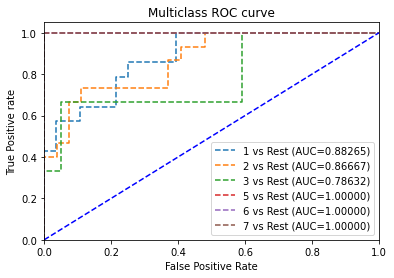

In [119]:
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))
# print(y_test, y_test_binarized, pred_prob)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 6
classes = [1,2,3,5,6,7]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.5f)'%(classes[i],roc_auc[i]))
print(roc_auc)

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show() 

# Kernel = Polynomial basis function, C=200, and gamma = 1.233.

In [120]:
svc = SVC(C=200, gamma= 1.233, kernel= 'poly')

Accuracy scores: [0.55813953 0.48837209 0.62790698 0.65116279 0.71428571]
Mean accuracy: 0.6079734219269104


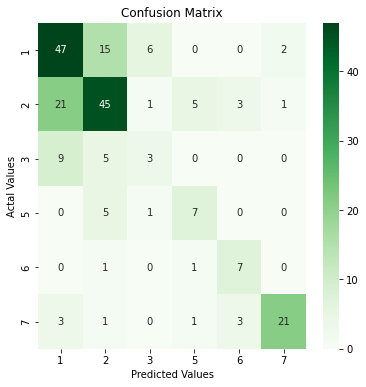

num_classes: 6

Sensitivity_class_0: 0.6714285612106323
Specificity_class_0: 0.7708333134651184
F1_score_class_0: 0.6266666486528184

Sensitivity_class_1: 0.5921052694320679
Specificity_class_1: 0.804347813129425
F1_score_class_1: 0.6081081114170585

Sensitivity_class_2: 0.1764705926179886
Specificity_class_2: 0.9593908786773682
F1_score_class_2: 0.2142857200257024

Sensitivity_class_3: 0.5384615659713745
Specificity_class_3: 0.96517413854599
F1_score_class_3: 0.5185185312734216

Sensitivity_class_4: 0.7777777910232544
Specificity_class_4: 0.9707317352294922
F1_score_class_4: 0.6363636600084539

Sensitivity_class_5: 0.7241379022598267
Specificity_class_5: 0.9837837815284729
F1_score_class_5: 0.792452812958714

Overall Accuracy is:  0.6074766355140186


In [121]:

# Use cross-validation to evaluate the SVC classifier
scores = cross_val_score(svc, x, y, cv=5)
svc.fit(x,y)
# Print the accuracy scores for each fold and the mean accuracy
print("Accuracy scores:", scores)
print("Mean accuracy:", scores.mean())

y_pred = cross_val_predict(svc, x, y, cv=5)
cm_svc = confusion_matrix(y, y_pred)

accuracy = accuracy_score(y, y_pred)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm_svc,
                     index = ['1','2','3','5','6','7'], 
                     columns = ['1','2','3','5','6','7'])
#Plotting the confusion matrix
plt.figure(figsize=(6,6))
sns.heatmap(cm_df,cmap='Greens', fmt='g', annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


# New Code Implemented Today to Compute the values of TPR, FPR, TNR, FNR.
import numpy as np
# assume cm_svc is the confusion matrix for a multiclass classification problem
num_classes = cm_svc.shape[0] # 6

print("num_classes:",num_classes)
print()
TPR = np.zeros(num_classes)
FPR = np.zeros(num_classes)
TNR = np.zeros(num_classes)
FNR = np.zeros(num_classes)
PPV = np.zeros(num_classes)

for i in range(num_classes):
    TP = cm_svc[i, i]
    FN = np.sum(cm_svc[i, :]) - TP
    FP = np.sum(cm_svc[:, i]) - TP
    TN = np.sum(cm_svc) - TP - FN - FP
    
    FP = FP.astype(np.float32)
    FN = FN.astype(np.float32)
    TP = TP.astype(np.float32)
    TN = TN.astype(np.float32)
    # Sensitivity
    TPR[i] = TP / (TP + FN)
    # False positive rate
    FPR[i] = FP / (FP + TN)
    # Specificity
    TNR[i] = TN / (TN + FP)
    # False negative rate
    FNR[i] = FN / (TP + FN)
    # Precision
    PPV[i] = TP / (TP + FP)
    print("Sensitivity_class_{}: {}".format(i,TPR[i]))
    print("Specificity_class_{}: {}".format(i,TNR[i]))
    f1_score = (2*PPV[i]*TPR[i])/(PPV[i]+TPR[i])
    print("F1_score_class_{}: {}".format(i, f1_score))
    print()
    
print("Overall Accuracy is: ", accuracy)


In [122]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier

In [123]:
from sklearn.metrics import roc_curve,auc
import numpy as np
from sklearn.preprocessing import label_binarize

# Define the number of folds
n_splits = 5

# Initialize the cross-validation method
cv = StratifiedKFold(n_splits=n_splits)

SVC_ROC=OneVsRestClassifier(svc)

In [124]:
# Initialize the list to store the accuracy scores
scores = []
# Loop over the folds
for train_idx, test_idx in cv.split(x, y):
    # Split the data into training and test sets
    x_train, y_train = x[train_idx], y[train_idx]
    x_test, y_test = x[test_idx], y[test_idx]
    
    # Fit the classifier on the training data
    SVC_ROC.fit(x_train, y_train)
    # Evaluate the classifier on the test data and store the score
    y_pred = SVC_ROC.predict(x_test)
    pred_prob = SVC_ROC.decision_function(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

{0: 0.806122448979592, 1: 0.7135802469135802, 2: 0.7350427350427351, 3: 0.6581196581196581, 4: 0.9, 5: 1.0}


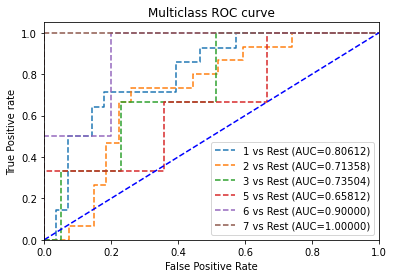

In [125]:
y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))
# print(y_test, y_test_binarized, pred_prob)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 6
classes = [1,2,3,5,6,7]

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--', 
             label='%s vs Rest (AUC=%0.5f)'%(classes[i],roc_auc[i]))
print(roc_auc)

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show() 